## Final analysis

In [1]:
import pandas as pd
#all
all_data = pd.read_excel("Data2/מתכלל ראשון ושני.xlsx")

#sviot ratzon
all_data[all_data.columns[-1]] = all_data[all_data.columns[-1]].apply(lambda x: "כן" if x==1 else "לא")

#heil avir & yom alef
yom_alef_avir = all_data[(all_data["חיל אוויר"]=="כן")&(all_data["יום בשבוע"]=="ראשון")]
#heil avir & yom bet
yom_bet_avir = all_data[(all_data["חיל אוויר"]=="כן")&(all_data["יום בשבוע"]=="שני")]

#else & yom alef
yom_alef_else = all_data[(all_data["חיל אוויר"]=="לא")&(all_data["יום בשבוע"]=="ראשון")]

#else & yom bet
yom_bet_else = all_data[(all_data["חיל אוויר"]=="לא")&(all_data["יום בשבוע"]=="שני")]

In [2]:
all_data.dtypes

חותמת זמן                                                                             datetime64[ns]
מהו מגדרך?                                                                                    object
מהו סוג שירותך?                                                                               object
מהו מקום המגורים שלך?                                                                         object
מהו הבסיס אליו אתה מגיע?                                                                      object
מהו מתחם ההסעה בו אתה נמצא כעת?                                                               object
מהי תדירות יציאותיך מהבסיס?                                                                   object
מדוע הגעת לתחנה זו היום? (ניתן לסמן יותר מתשובה אחת)                                          object
באיזו שעה הוגדר לך להגיע לבסיס היום?                                                          object
באיזו שעה אתה מעריך שתגיע לבסיס היום?                                                      

In [3]:
import matplotlib.pyplot as plt
def four_plot_nominal(column_number = None, plot_color = 'teal', text_color = 'cyan'):
    """
    four graph for numinal objects
    """
    plt.style.use('ggplot')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.suptitle(all_data.columns[column_number][::-1], size = 20)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    #יום א יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_alef_else[yom_alef_else.columns[column_number]].value_counts().index.tolist()]
    ax1.bar(labels,yom_alef_else[all_data.columns[column_number]].value_counts(), color = plot_color)
    ax1.set_title("יחידות צהל ללא חיל אויר יום א"[::-1])
    
    for j in range(len(yom_alef_else[yom_alef_else.columns[column_number]].value_counts())):
        txt = f"{round(yom_alef_else[yom_alef_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax1.text(j, yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[j]+5,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #יום ב יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_bet_else[yom_bet_else.columns[column_number]].value_counts().index.tolist()]
    ax2.bar(labels,yom_bet_else[yom_bet_else.columns[column_number]].value_counts(), color = plot_color)
    ax2.set_title("יחידות צהל ללא חיל אויר יום ב"[::-1])
    ax2.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_else[yom_bet_else.columns[column_number]].value_counts())):
        txt = f"{round(yom_bet_else[yom_bet_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax2.text(j, yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום א
    labels = [label[::-1] for label in yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts().index.tolist()]
    ax3.bar(labels,yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(), color = plot_color)
    ax3.set_title("חיל אויר יום א"[::-1])
    ax3.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts())):
        txt = f"{round(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax3.text(j, yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום ב
    labels = [label[::-1] for label in yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts().index.tolist()]
    ax4.bar(labels,yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(), color = plot_color)
    ax4.set_title("חיל אויר יום ב"[::-1])
    ax4.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts())):
        txt = f"{round(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax4.text(j, yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[j]-1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))
    
def all_plot_nominal(column_number = None, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (8,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts(), color = plot_color)
    for j in range(len(all_data[all_data.columns[column_number]].value_counts())):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+5,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.show()
    
def four_plot_nominal2(column_number = None, n= 10,height = 10, width = 10, plot_color = 'teal', text_color = 'cyan'):
    """
    four graph for numinal objects
    """
    plt.style.use('ggplot')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_figheight(height)
    fig.set_figwidth(width)
    fig.suptitle(all_data.columns[column_number][::-1], size = 20)

    #יום א יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_alef_else[yom_alef_else.columns[column_number]].value_counts().index.tolist()[:n]]
    ax1.bar(labels,yom_alef_else[all_data.columns[column_number]].value_counts()[:n], color = plot_color)
    ax1.set_xticklabels(labels,rotation=45)
    ax1.set_title("יחידות צהל ללא חיל אויר יום א"[::-1])
    ax1.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_alef_else[yom_alef_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax1.text(j, yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #יום ב יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_bet_else[yom_bet_else.columns[column_number]].value_counts().index.tolist()[:n]]
    ax2.bar(labels,yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[:n], color = plot_color)
    ax2.set_xticklabels(labels,rotation=45)
    ax2.set_title("יחידות צהל ללא חיל אויר יום ב"[::-1])
    ax2.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_bet_else[yom_bet_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax2.text(j, yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום א
    labels = [label[::-1] for label in yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts().index.tolist()[:n]]
    ax3.bar(labels,yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[:n], color = plot_color)
    ax3.set_xticklabels(labels,rotation=45)
    ax3.set_title("חיל אויר יום א"[::-1])
    ax3.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax3.text(j, yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום ב
    labels = [label[::-1] for label in yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts().index.tolist()[:n]]
    ax4.bar(labels,yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[:n], color = plot_color)
    ax4.set_xticklabels(labels,rotation=45)
    ax4.set_title("חיל אויר יום ב"[::-1])
    ax4.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax4.text(j, yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[j]-1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))
    
def all_plot_nominal2(column_number = None,n = 10, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (20,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()[:n]]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts()[:n], color = plot_color)
    
    for j in range(len(all_data[all_data.columns[column_number]].value_counts()[:n])):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.show()
#for ax in fig.get_axes():
    #ax.label_outer()
    
def all_plot_nominal3(column_number = None,n = 10, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (20,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()[:n]]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts()[:n], color = plot_color)

    for j in range(len(all_data[all_data.columns[column_number]].value_counts()[:n])):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.xticks(rotation=90)
    plt.show()

# מגדר

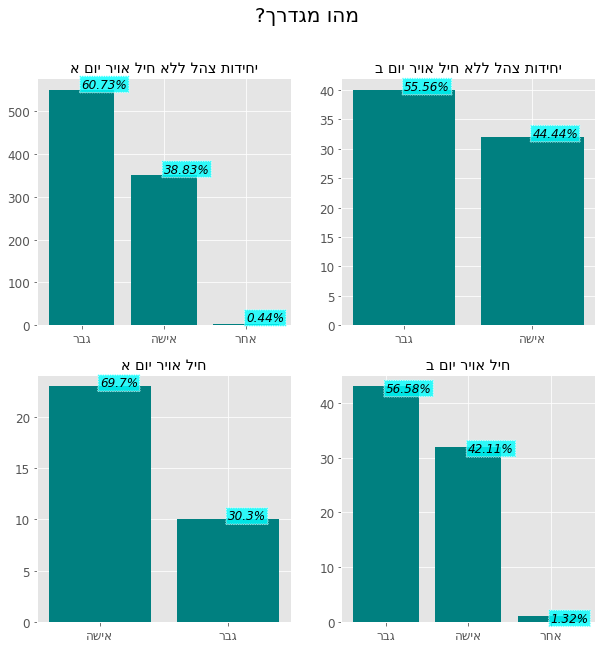

In [4]:
four_plot_nominal(1)

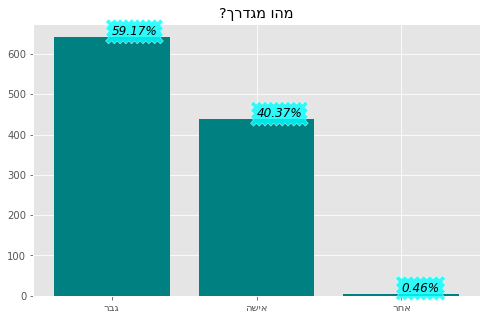

In [5]:
all_plot_nominal(1)

# סוג שירות

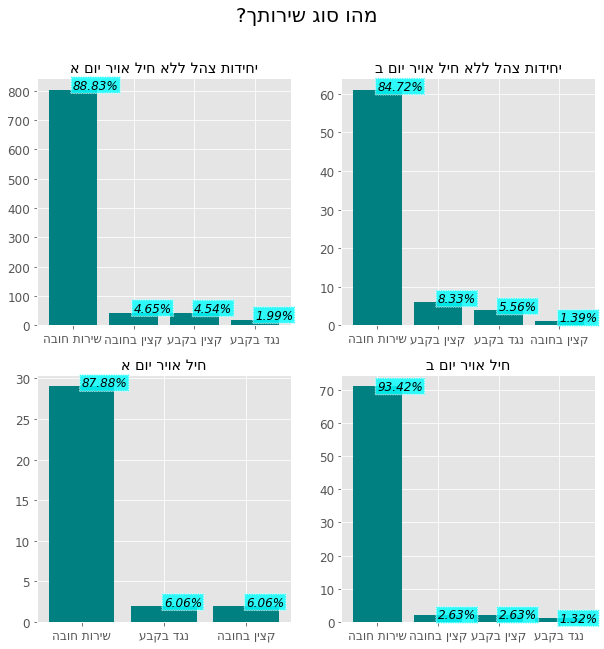

In [6]:
four_plot_nominal(2)

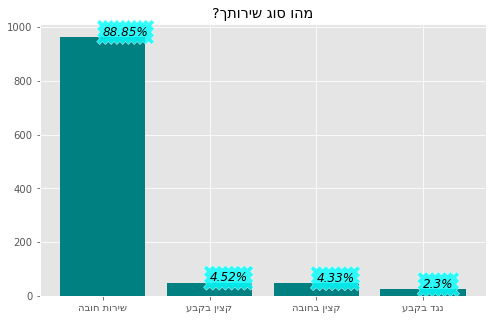

In [7]:
all_plot_nominal(2)

# מקום מגורים

C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


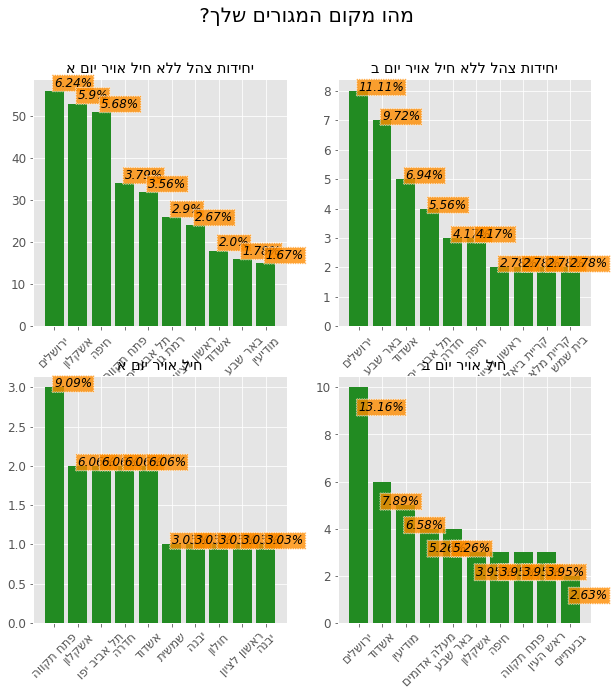

In [8]:
four_plot_nominal2(3,plot_color = 'forestgreen',text_color ='darkorange')

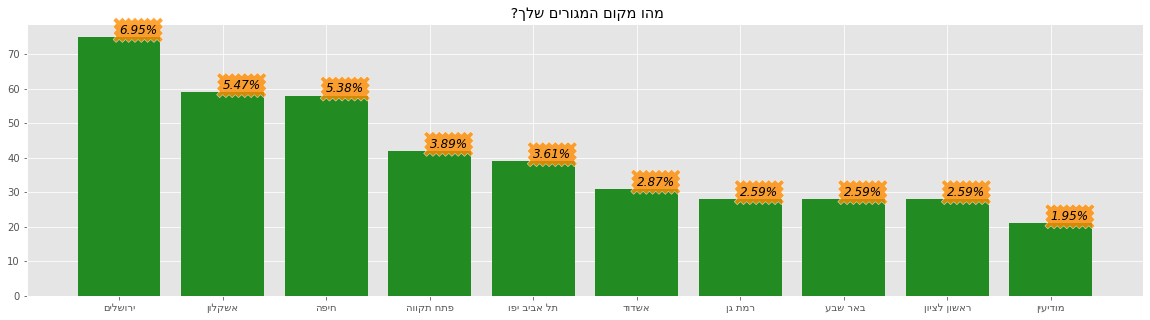

In [9]:
all_plot_nominal2(3,plot_color = 'forestgreen',text_color ='darkorange')

# בסיס

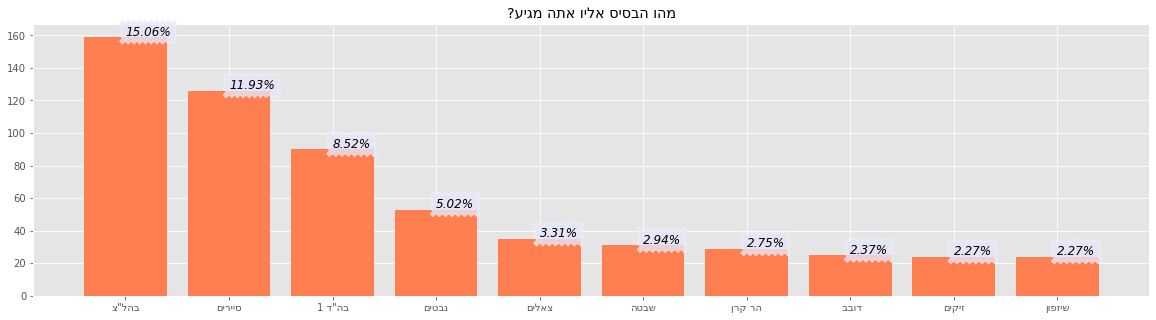

In [10]:
all_plot_nominal2(4,plot_color = 'coral',text_color ='lavender')

C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


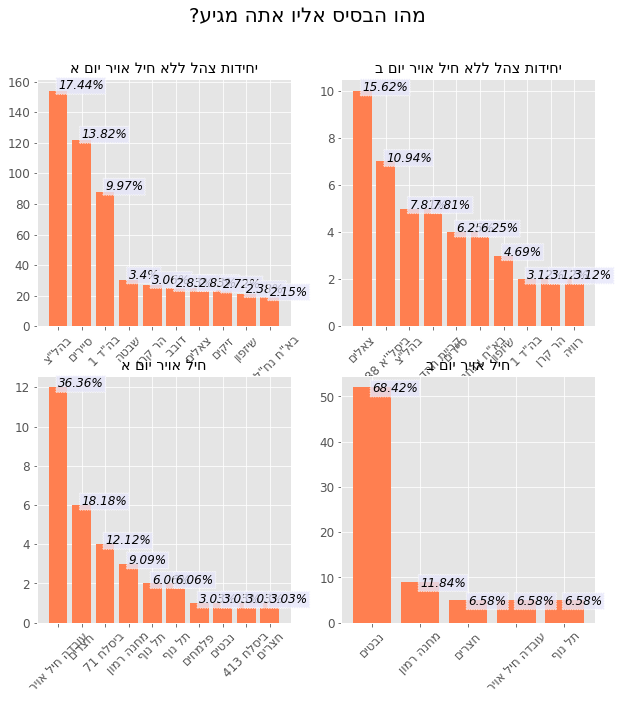

In [11]:
four_plot_nominal2(4,plot_color = 'coral',text_color ='lavender')

# מתחם הסעה

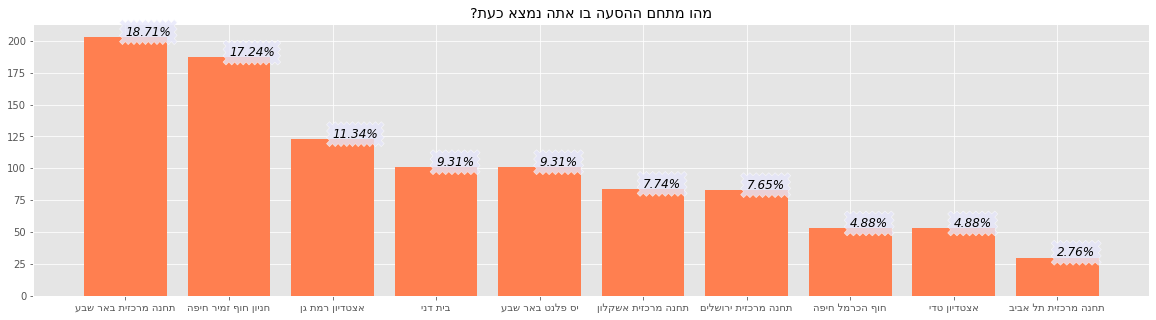

In [12]:
all_plot_nominal2(5,plot_color = 'coral',text_color ='lavender')

C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


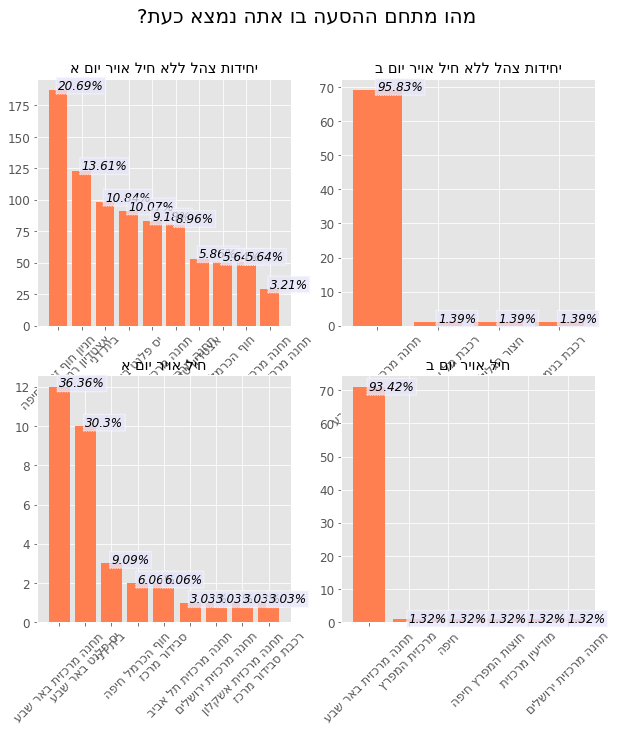

In [13]:
four_plot_nominal2(5,plot_color = 'coral',text_color ='lavender')

# תדירות יציאות מהבסיס

C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


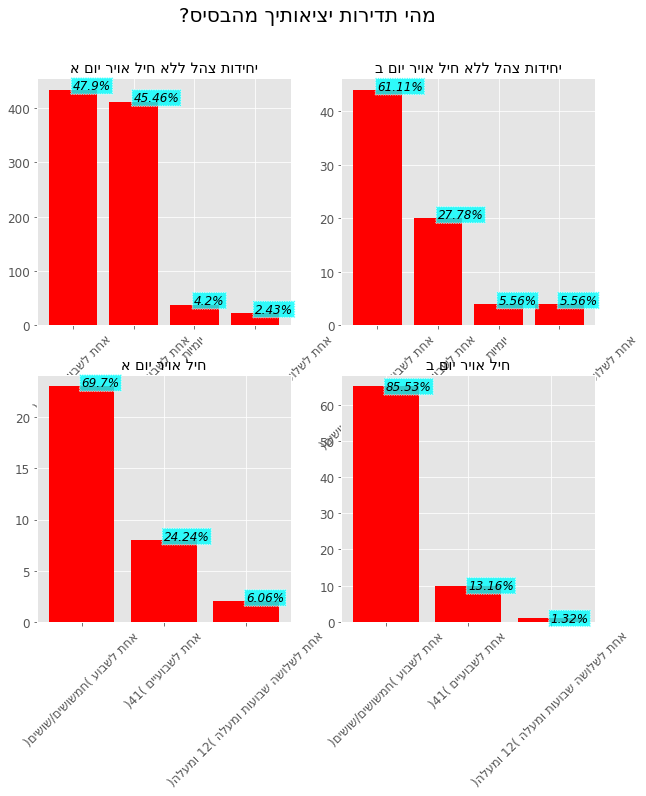

In [14]:
four_plot_nominal2(6,4,10,10,'red','cyan')

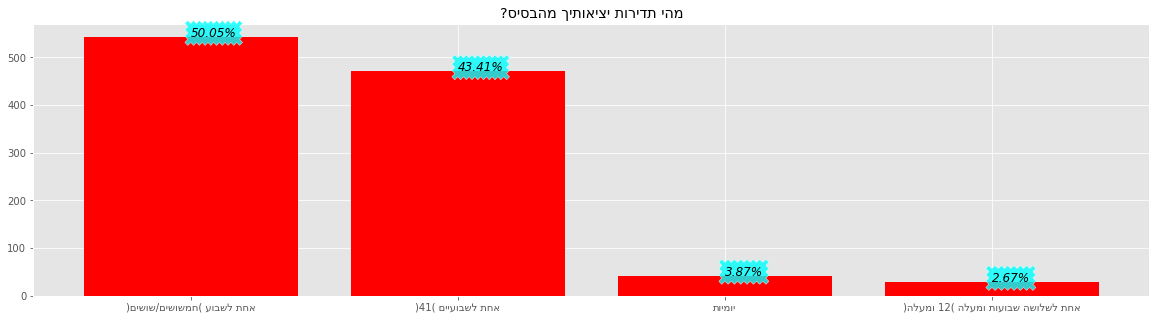

In [15]:
all_plot_nominal2(6,4,'red','cyan')

# סיבת הגעה לתחנה

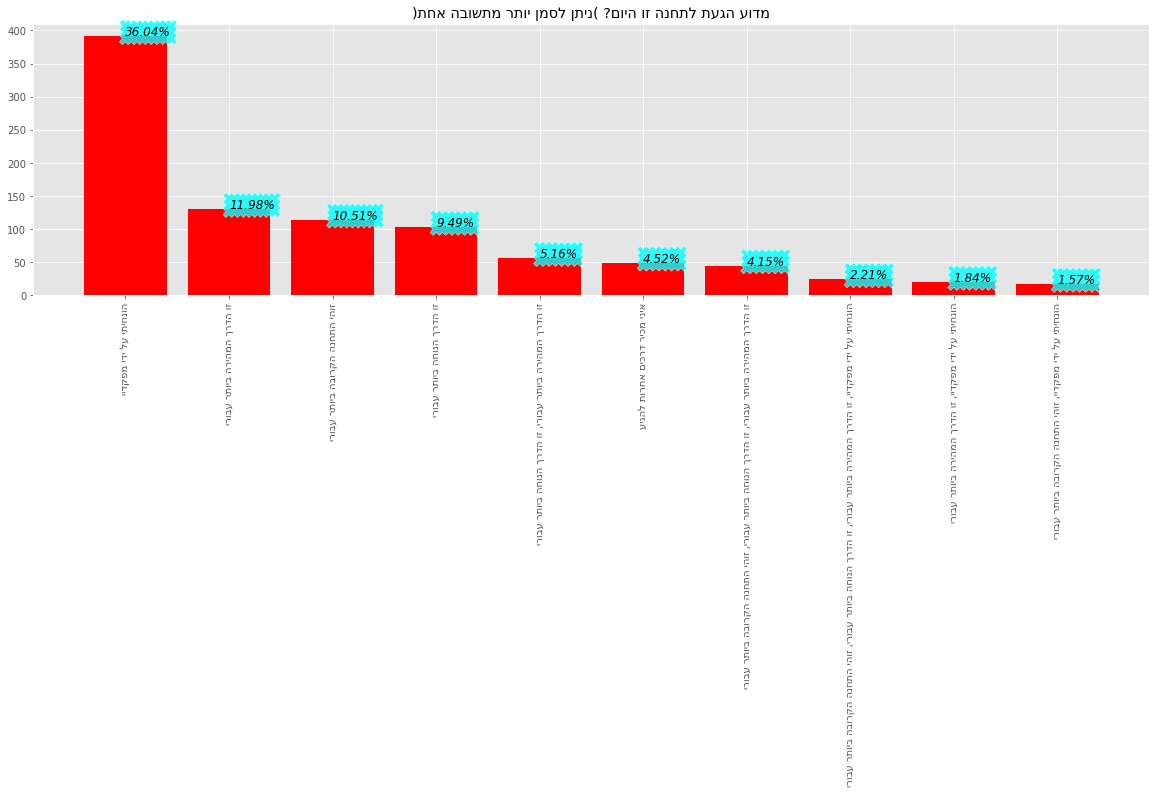

In [16]:
all_plot_nominal3(7,10,'red','cyan')

C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_23536/2443696901.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


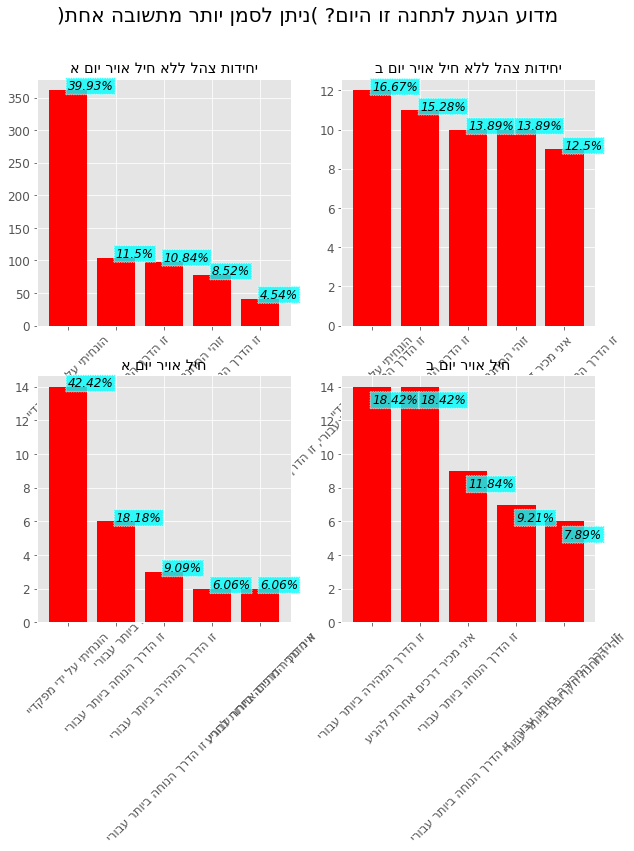

In [17]:
four_plot_nominal2(7,5,10,10,'red','cyan')

In [18]:
df = all_data.groupby(by = all_data.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                             count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                      
אצטדיון רמת גן                                                                  68   
חניון חוף זמיר חיפה                                                             62   
יס פלנט באר שבע                                                                 52   
בית דני                                                                         33   
תחנה מרכזית באר שבע                                                             28   
תחנה מרכזית ירושלים                                                             14   
אצטדיון טדי                                                                     13   
תחנה מרכזית אשקלון                                                              11   
חוף הכרמל חיפה                                                                   6   
תחנה מרכזית תל אביב                                                              6   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
אצטדיון רמת גן                   4.161765  
חניון חוף זמיר חיפה              4.161290  
יס פלנט באר שבע                  3.923077  
בית דני                          4.333333  
תחנה מרכזית באר שבע              4.107143  
תחנה מרכזית ירושלים              3.928571  
אצטדיון טדי                      4.615385  
תחנה מרכזית אשקלון               3.545455  
חוף הכרמל חיפה                   3.666667  
תחנה מרכזית תל אביב              3.500000

In [19]:
df = yom_alef_avir.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                             count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                      
סבידור מרכז                                                                      2   
תחנה מרכזית באר שבע                                                              2   
בית דני                                                                          0   
חוף הכרמל חיפה                                                                   0   
יס פלנט באר שבע                                                                  0   
רכבת סבידור מרכז                                                                 0   
תחנה מרכזית אשקלון                                                               0   
תחנה מרכזית ירושלים                                                              0   
תחנה מרכזית תל אביב                                                              0   

                                      
                                mean  
מהו מתחם ההסעה בו אתה נמצא כעת?       
סבידור מרכז                      5.0  
תחנה מרכזית באר שבע              3.0  
בית דני                          NaN  
חוף הכרמל חיפה                   NaN  
יס פלנט באר שבע                  NaN  
רכבת סבידור מרכז                 NaN  
תחנה מרכזית אשקלון               NaN  
תחנה מרכזית ירושלים              NaN  
תחנה מרכזית תל אביב              NaN

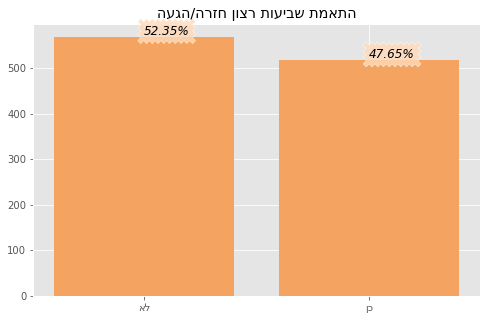

In [20]:
all_plot_nominal(-1,'sandybrown','peachpuff')

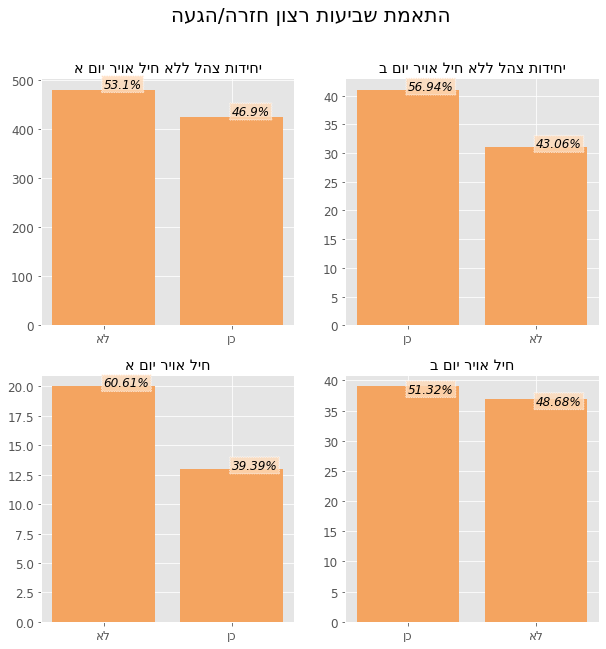

In [21]:
four_plot_nominal(-1,'sandybrown','peachpuff')

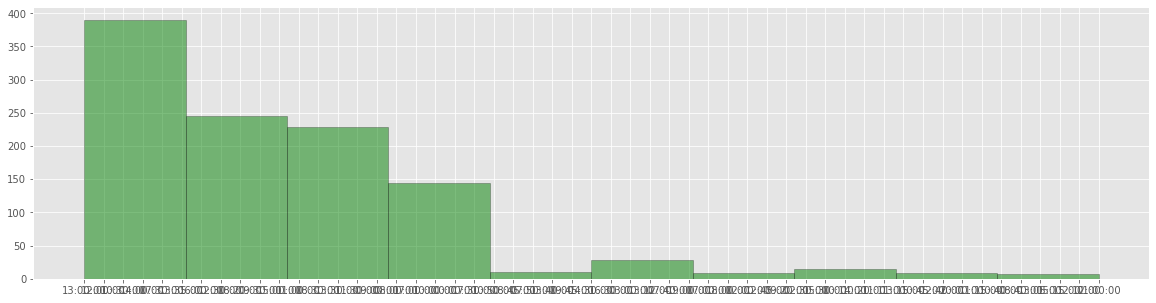

In [22]:
plt.figure(figsize = (20,5))
plt.hist(all_data[all_data.columns[8]], alpha=0.5,histtype='bar', color='green',edgecolor='black')
plt.xticks()
plt.show()

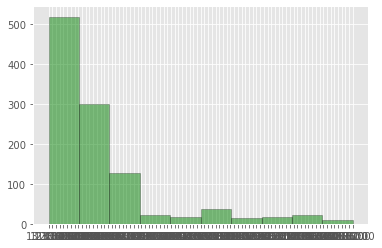

In [23]:
plt.hist(all_data[all_data.columns[9]], alpha=0.5,histtype='bar', color='green',edgecolor='black')
plt.show()

# תדרוך יציאה הביתה

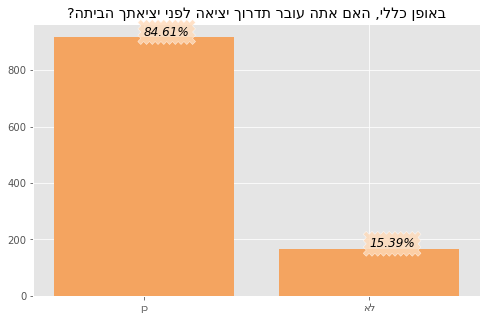

In [24]:
all_plot_nominal(12,'sandybrown','peachpuff')

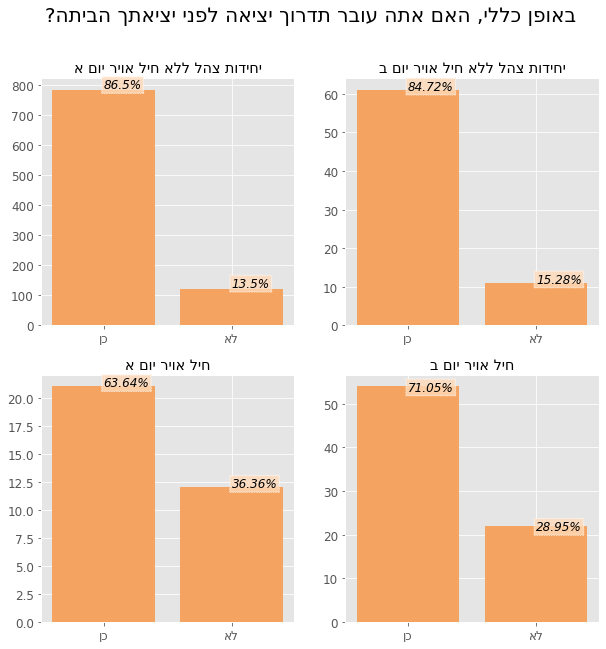

In [25]:
four_plot_nominal(12,'sandybrown','peachpuff')